In [1]:
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
import string
from collections import Counter
import re


In [2]:

df = pd.read_pickle('dataset_sentimens.pckl')
#df = df[df.neun_euro_context]
df['text'] = df['text'].apply(lambda x: re.sub(r"\@\w+", "", x))
df['text'] = df['text'].apply(lambda x: re.sub(r'\n', ' ', x))


In [3]:
(df)

,index,text,id,public_metrics.retweet_count,public_metrics.reply_count,public_metrics.like_count,public_metrics.quote_count,lang,created_at,conversation_id,...,query,is_retweet,created_at_day,neun_euro_context,text_altered,sentiments,positive,negative,neutral,created_at_week
0,6,Seit nun 2 Monaten: Bahn Bus Tram EScooter F...,1518205949185560577,0,0,0,0,de,2022-04-24T12:31:19.000Z,1518199287871676417,...,[Tram Fahrrad],0,2022-04-24,False,Seit nun 2 Monaten: Bahn Bus Tram EScooter F...,neutral,-1.517049,-0.635520,2.956395,16
1,7,Hab mir gestern extra noch ein gebrauchtes Ra...,1518208189724045312,0,1,6,0,de,2022-04-24T12:40:14.000Z,1518199287871676417,...,[Zug rad],0,2022-04-24,False,Hab mir gestern extra noch ein gebrauchtes Ra...,negative,-2.105188,2.767214,0.049121,16
2,10,"Hallo Berlin 😬 Derjenige, der das Rad da run...",1518211586208542721,0,1,0,0,de,2022-04-24T12:53:43.000Z,1517479119650541568,...,[ubahn rad],0,2022-04-24,False,"Hallo Berlin 😬\n\nDerjenige, der das Rad da r...",neutral,-1.654308,-0.505657,3.083258,16
3,11,"""...when you are travelling on the train."" Ko...",1518215051332698115,0,1,1,0,de,2022-04-24T13:07:29.000Z,1517923032811155456,...,[Zug rad],0,2022-04-24,False,"""...when you are travelling on the train."" Ko...",neutral,-0.410769,-1.033835,2.158778,16
4,12,Kann ich 0% verstehen. Ich habe auch schon ...,1518215063311683584,0,1,1,0,de,2022-04-24T13:07:32.000Z,1518177980681498627,...,[Zug rad],0,2022-04-24,False,Kann ich 0% verstehen. Ich habe auch schon ...,negative,-1.647418,4.813928,-3.838440,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6743,22307,genau. Pull hat im ÖPNV nie funktioniert. Es ...,1550750716880355329,0,1,2,0,de,2022-07-23T07:52:37.000Z,1550738488366071810,...,[ÖPNV rad],0,2022-07-23,False,genau. Pull hat im ÖPNV nie funktioniert. Es ...,negative,-2.350543,1.930289,1.582345,29
6744,22309,Unsinn. Der motorisierte Individualverkehr...,1550751332113567744,0,1,1,0,de,2022-07-23T07:55:03.000Z,1550664013519921152,...,[Tram rad],0,2022-07-23,False,Unsinn. Der motorisierte Individualverkehr...,neutral,-1.735076,-1.092031,3.949889,29
6745,22317,"Was nichts daran ändert, dass man mit einem ...",1550753534521614336,0,1,0,0,de,2022-07-23T08:03:48.000Z,1550706666156527617,...,[Bus Fahrrad],0,2022-07-23,False,"Was nichts daran ändert, dass man mit einem ...",neutral,-1.918532,-0.046952,3.054691,29
6746,22320,"Kommunismus ist , wenn man , statt Straßenbahn...",1550756032250449920,0,0,0,0,de,2022-07-23T08:13:44.000Z,1550756032250449920,...,[Straßenbahn rad],0,2022-07-23,False,"Kommunismus ist , wenn man , statt Straßenbahn...",negative,-0.888816,2.547124,-2.180989,29


In [4]:
cluster_variables = ['public_metrics.retweet_count', 
                    'public_metrics.reply_count', 
                    'public_metrics.quote_count', 
                    #'author_id', 
                    #'is_retweet', 
                    #'neun_euro_context', 
                    'positive', 
                    'negative', 
                    'neutral']

In [5]:
cluster_variables = [
    #'public_metrics.retweet_count', 
     #               'public_metrics.reply_count', 
      #              'public_metrics.quote_count', 
                    #'author_id', 
                    #'is_retweet', 
                    #'neun_euro_context', 
                    'positive', 
                    'negative', 
                    'neutral']

In [6]:
stop_words_german = list()
with open('stopp_wörter_deutsch.txt','r') as file:
   
    # reading each line    
    for line in file:
   
        # reading each word        
        for word in line.split(','):
   
            # displaying the words           
            stop_words_german.append(word.replace(' ',''))

In [7]:
# X = df[cluster_variables].to_numpy()
# scaler = StandardScaler()
# X = scaler.fit_transform(X)


In [8]:
len(df['text'].unique())

6737

In [9]:
# df['text'] = df['text'].str.replace('\n',' ')
corpus = df['text']
vectorizer = TfidfVectorizer(stop_words=stop_words_german,
                            strip_accents='unicode',
                            max_df=0.8,
                            min_df=100
                            )
X = vectorizer.fit_transform(corpus)
vectorizer.get_feature_names()


# X = np.hstack((df[['positive', 'negative', 'neutral']].to_numpy(),X))


/home/egon/.local/lib/python3.8/site-packages/sklearn/feature_extraction/text.py:388: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['wahr'] not in stop_words.
  warnings.warn('Your stop_words may be inconsistent with '


['10',
 '20',
 '30',
 '9euroticket',
 'amp',
 'arbeit',
 'aufs',
 'auto',
 'autos',
 'bahn',
 'bahnhof',
 'berlin',
 'bike',
 'brauchen',
 'braucht',
 'bus',
 'co',
 'eher',
 'eigentlich',
 'einfach',
 'euro',
 'fahr',
 'fahren',
 'fahrrad',
 'fuß',
 'gefahren',
 'genau',
 'gerne',
 'hab',
 'halt',
 'ice',
 'km',
 'land',
 'lassen',
 'laufen',
 'leider',
 'leute',
 'min',
 'minuten',
 'mitnehmen',
 'mobilitat',
 'ne',
 'nehmen',
 'nutzen',
 'opnv',
 'per',
 'pkw',
 'platz',
 'problem',
 'rad',
 're',
 'schneller',
 'stadt',
 'stehen',
 'straßenbahn',
 'strecke',
 'strecken',
 'stunde',
 'ticket',
 'tram',
 'unterwegs',
 'velo',
 'verkehrswende',
 'voll',
 'weg',
 'zug']

In [10]:
df[['positive', 'negative', 'neutral']].to_numpy().shape

(6748, 3)

In [11]:
tmp = df[['positive', 
           'negative', 
           'neutral'
         ]].to_numpy()
tmp2 = X.toarray()

In [12]:
X = np.hstack((tmp,tmp2))


In [13]:
X

array([[-1.51704931, -0.63552046,  2.95639515, ...,  0.        ,
         0.        ,  0.        ],
       [-2.10518837,  2.7672143 ,  0.04912144, ...,  0.        ,
         0.        ,  0.39277241],
       [-1.65430808, -0.50565737,  3.08325768, ...,  0.        ,
         0.51088314,  0.        ],
       ...,
       [-1.91853213, -0.04695213,  3.0546906 , ...,  0.        ,
         0.        ,  0.        ],
       [-0.88881642,  2.54712439, -2.18098855, ...,  0.        ,
         0.        ,  0.        ],
       [-2.09290457, -0.86367798,  4.3063097 , ...,  0.        ,
         0.        ,  0.        ]])

In [14]:
# distortions_euclidean = []
# distortions_minkowski = []
# distortions_cityblock = []
# inertias = []
# mapping1 = {}
# mapping2 = {}
# K = range(1, 10)

# for k in K:
#     # Building and fitting the model
#     kmeanModel = KMeans(n_clusters=k).fit(X)
#     kmeanModel.fit(X)

#     distortions_euclidean.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_,
#                                         'euclidean'), axis=1)) / X.shape[0])
#     distortions_minkowski.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_,
#                                         'minkowski'), axis=1)) / X.shape[0])
#     distortions_cityblock.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_,
#                                         'cityblock'), axis=1)) / X.shape[0])
#     inertias.append(kmeanModel.inertia_)

#     mapping1[k] = sum(np.min(cdist(X, kmeanModel.cluster_centers_,
#                                    'euclidean'), axis=1)) / X.shape[0]
#     mapping2[k] = kmeanModel.inertia_
    
#     print(k)


In [15]:
# for key, val in mapping1.items():
# #     print(f'{key} : {val}')


In [16]:
# K = range(1,10)
# plt.plot(K, distortions_euclidean, 'bx-')
# plt.plot(K, distortions_minkowski, 'gx-')
# plt.plot(K, distortions_cityblock, 'rx-')
# plt.xlabel('Values of K')
# plt.ylabel('Distortion')
# plt.title('The Elbow Method using Distortion')
# plt.show()


In [17]:
# for key, val in mapping2.items():
#    print(f'{key} : {val}')

In [18]:
# plt.plot(K, inertias, 'bx-')
# plt.xlabel('Values of K')
# plt.ylabel('Inertia')
# plt.title('The Elbow Method using Inertia')
# plt.show()

In [19]:
X

array([[-1.51704931, -0.63552046,  2.95639515, ...,  0.        ,
         0.        ,  0.        ],
       [-2.10518837,  2.7672143 ,  0.04912144, ...,  0.        ,
         0.        ,  0.39277241],
       [-1.65430808, -0.50565737,  3.08325768, ...,  0.        ,
         0.51088314,  0.        ],
       ...,
       [-1.91853213, -0.04695213,  3.0546906 , ...,  0.        ,
         0.        ,  0.        ],
       [-0.88881642,  2.54712439, -2.18098855, ...,  0.        ,
         0.        ,  0.        ],
       [-2.09290457, -0.86367798,  4.3063097 , ...,  0.        ,
         0.        ,  0.        ]])

In [20]:
n=10
kmeans = KMeans(n_clusters=n, random_state=0).fit(X)
kmeans.labels_

cluster_centers = kmeans.cluster_centers_


In [21]:
df

,index,text,id,public_metrics.retweet_count,public_metrics.reply_count,public_metrics.like_count,public_metrics.quote_count,lang,created_at,conversation_id,...,query,is_retweet,created_at_day,neun_euro_context,text_altered,sentiments,positive,negative,neutral,created_at_week
0,6,Seit nun 2 Monaten: Bahn Bus Tram EScooter F...,1518205949185560577,0,0,0,0,de,2022-04-24T12:31:19.000Z,1518199287871676417,...,[Tram Fahrrad],0,2022-04-24,False,Seit nun 2 Monaten: Bahn Bus Tram EScooter F...,neutral,-1.517049,-0.635520,2.956395,16
1,7,Hab mir gestern extra noch ein gebrauchtes Ra...,1518208189724045312,0,1,6,0,de,2022-04-24T12:40:14.000Z,1518199287871676417,...,[Zug rad],0,2022-04-24,False,Hab mir gestern extra noch ein gebrauchtes Ra...,negative,-2.105188,2.767214,0.049121,16
2,10,"Hallo Berlin 😬 Derjenige, der das Rad da run...",1518211586208542721,0,1,0,0,de,2022-04-24T12:53:43.000Z,1517479119650541568,...,[ubahn rad],0,2022-04-24,False,"Hallo Berlin 😬\n\nDerjenige, der das Rad da r...",neutral,-1.654308,-0.505657,3.083258,16
3,11,"""...when you are travelling on the train."" Ko...",1518215051332698115,0,1,1,0,de,2022-04-24T13:07:29.000Z,1517923032811155456,...,[Zug rad],0,2022-04-24,False,"""...when you are travelling on the train."" Ko...",neutral,-0.410769,-1.033835,2.158778,16
4,12,Kann ich 0% verstehen. Ich habe auch schon ...,1518215063311683584,0,1,1,0,de,2022-04-24T13:07:32.000Z,1518177980681498627,...,[Zug rad],0,2022-04-24,False,Kann ich 0% verstehen. Ich habe auch schon ...,negative,-1.647418,4.813928,-3.838440,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6743,22307,genau. Pull hat im ÖPNV nie funktioniert. Es ...,1550750716880355329,0,1,2,0,de,2022-07-23T07:52:37.000Z,1550738488366071810,...,[ÖPNV rad],0,2022-07-23,False,genau. Pull hat im ÖPNV nie funktioniert. Es ...,negative,-2.350543,1.930289,1.582345,29
6744,22309,Unsinn. Der motorisierte Individualverkehr...,1550751332113567744,0,1,1,0,de,2022-07-23T07:55:03.000Z,1550664013519921152,...,[Tram rad],0,2022-07-23,False,Unsinn. Der motorisierte Individualverkehr...,neutral,-1.735076,-1.092031,3.949889,29
6745,22317,"Was nichts daran ändert, dass man mit einem ...",1550753534521614336,0,1,0,0,de,2022-07-23T08:03:48.000Z,1550706666156527617,...,[Bus Fahrrad],0,2022-07-23,False,"Was nichts daran ändert, dass man mit einem ...",neutral,-1.918532,-0.046952,3.054691,29
6746,22320,"Kommunismus ist , wenn man , statt Straßenbahn...",1550756032250449920,0,0,0,0,de,2022-07-23T08:13:44.000Z,1550756032250449920,...,[Straßenbahn rad],0,2022-07-23,False,"Kommunismus ist , wenn man , statt Straßenbahn...",negative,-0.888816,2.547124,-2.180989,29


In [22]:
cluster_centers[0]

array([-6.73948233e-01, -7.65093403e-01,  2.10924795e+00,  1.61785897e-02,
        1.00300516e-02,  1.50165946e-02,  2.15119522e-02,  1.81425825e-02,
        1.95946820e-02,  1.33425539e-02,  7.62140252e-02,  1.86974472e-02,
        4.89043527e-02,  8.16378590e-03,  1.22367996e-02,  1.46886347e-02,
        1.90054318e-03,  1.44649371e-02,  1.02530002e-01,  1.24131912e-01,
        6.11116875e-03,  7.24256513e-03,  3.32271778e-02,  5.45044783e-03,
        1.57934084e-02,  8.58036020e-02,  1.46821224e-01,  5.01483473e-02,
        1.83312474e-02,  1.09449041e-02,  1.76627889e-02,  1.02922100e-02,
        2.18000184e-02,  2.09850899e-02,  1.12411816e-02,  1.54542746e-02,
        2.11129064e-03,  1.05645505e-02,  6.90185632e-03,  9.29868676e-03,
        1.52418901e-02,  2.56415792e-02,  1.93723267e-02,  1.11638379e-02,
        1.16424264e-02,  1.74528118e-02,  5.90724308e-03,  1.07704916e-01,
        1.58142726e-02,  8.72648714e-03,  1.55016788e-02,  2.11929596e-02,
        1.54157390e-01,  

In [23]:
df['kmeans_label'] = kmeans.labels_

In [24]:
df['neun_euro_context'] = df['neun_euro_context']
df_auswertung = df.groupby('kmeans_label').mean()
df_auswertung['cluster_size'] =  np.bincount(kmeans.labels_)
df_auswertung['cluster_label'] =  range(n)
df_auswertung

,index,public_metrics.retweet_count,public_metrics.reply_count,public_metrics.like_count,public_metrics.quote_count,is_retweet,neun_euro_context,positive,negative,neutral,created_at_week,cluster_size,cluster_label
kmeans_label,,,,,,,,,,,,,
0,11562.612805,0.320122,0.759146,3.704268,0.036585,0.0,0.060976,-0.673948,-0.765093,2.109248,23.149390,328,0
1,11145.428999,0.140508,0.955157,3.804185,0.034380,0.0,0.076233,-1.501166,3.136350,-1.824014,22.913303,669,1
2,11384.590769,0.569231,0.718462,5.055385,0.038462,0.0,0.056923,-2.224681,-1.251406,4.956428,23.046154,650,2
3,10836.401544,0.135135,0.814672,5.768340,0.019305,0.0,0.054054,3.486919,-0.557983,-3.239464,22.725869,259,3
4,11739.569620,0.417722,1.184810,8.412658,0.058228,0.0,0.050633,-0.894161,3.875225,-4.046158,23.189873,395,4
5,10918.783505,0.515464,0.745704,3.972509,0.065292,0.0,0.030928,-3.359468,-2.754811,7.767136,22.759450,291,5
6,11181.179130,0.530435,0.921739,6.573913,0.081739,0.0,0.053913,-1.812049,1.388852,1.334201,22.876522,575,6
7,10767.332075,0.052830,0.641509,2.120755,0.011321,0.0,0.030189,1.464924,-0.309181,-0.709496,22.660377,265,7
8,11146.633441,0.316491,0.913643,4.777676,0.039963,0.0,0.067524,-1.977657,-0.308499,3.397698,22.905374,2177,8


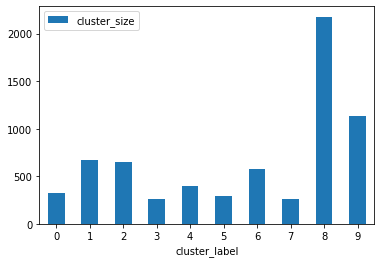

In [25]:
ax = df_auswertung.plot.bar(x='cluster_label', y='cluster_size', rot=0)

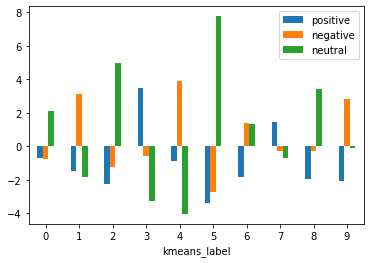

In [26]:
ax = df_auswertung[['positive', 'negative', 'neutral']].plot.bar(rot=0)

https://towardsdatascience.com/how-to-easily-cluster-textual-data-in-python-ab27040b07d8

In [27]:
df['text'] = df['text'].str.replace('\n',' ')

In [28]:
df_hashtags = pd.DataFrame()
for k in range(n):
    df_tmp = pd.DataFrame()
    df_tmp_2 = pd.DataFrame()
    df_tmp['hastag_list'] = df[df.kmeans_label == k].text.str.findall(r'#.*?(?=\s|$)')
    df_tmp['number_hastags'] = df_tmp['hastag_list'].apply(lambda x: len(x))
    df_tmp = df_tmp[df_tmp.number_hastags != 3]
    hashtags = list()
    for i, row in df_tmp.iterrows():
        hashtags += row['hastag_list']
    hashtag_dict = Counter([s.translate(str.maketrans('', '', string.punctuation)) for s in hashtags])
    tmp_dict = {k: v for k, v in sorted(hashtag_dict.items(), key=lambda item: item[1], reverse=True)}
    df_tmp_2 = df_tmp_2.from_dict(tmp_dict, orient='index', dtype=None, columns=None).reset_index()
    df_tmp_2['cluster'] = k
    df_hashtags = pd.concat([df_hashtags,df_tmp_2])

In [29]:
df_hashtags.groupby('cluster').head(3).reset_index(drop=True)

,index,0,cluster
0,9EuroTicket,9,0
1,Fahrrad,5,0
2,Zug,3,0
3,9EuroTicket,8,1
4,Fahrrad,5,1
5,fahrrad,3,1
6,Fahrrad,27,2
7,Verkehrswende,20,2
8,ÖPNV,18,2
9,9EuroTicket,6,3


In [30]:
df_hashtags.to_csv('output.csv')

In [31]:
df[['kmeans_label','neun_euro_context', 'positive', 'negative', 'neutral', 'text']].to_csv('output.csv')

In [32]:
df[~df.neun_euro_context][['positive', 'negative', 'neutral']].mean()

positive   -1.536572
negative    0.716818
neutral     1.529908
dtype: float64

In [33]:
df[df.neun_euro_context][['positive', 'negative', 'neutral']].mean()

positive   -1.639606
negative    0.794598
neutral     1.580959
dtype: float64

In [34]:
for i in range(n):
    plt.figure()
    sns.scatterplot(data=df[df.kmeans_label.isin([i])], x="negative", y="neutral", hue="kmeans_label", alpha=1)

NameError: name 'sns' is not defined

<Figure size 432x288 with 0 Axes>

In [35]:
np.bincount(kmeans.labels_)

array([ 328,  669,  650,  259,  395,  291,  575,  265, 2177, 1139])

In [36]:
df.groupby('kmeans_label').mean().T

kmeans_label,0,1,2,3,4,5,6,7,8,9
index,11562.612805,11145.428999,11384.590769,10836.401544,11739.569620,10918.783505,11181.179130,10767.332075,11146.633441,11056.131694
public_metrics.retweet_count,0.320122,0.140508,0.569231,0.135135,0.417722,0.515464,0.530435,0.052830,0.316491,0.226514
public_metrics.reply_count,0.759146,0.955157,0.718462,0.814672,1.184810,0.745704,0.921739,0.641509,0.913643,0.873573
public_metrics.like_count,3.704268,3.804185,5.055385,5.768340,8.412658,3.972509,6.573913,2.120755,4.777676,4.548727
public_metrics.quote_count,0.036585,0.034380,0.038462,0.019305,0.058228,0.065292,0.081739,0.011321,0.039963,0.034241
is_retweet,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
neun_euro_context,0.060976,0.076233,0.056923,0.054054,0.050633,0.030928,0.053913,0.030189,0.067524,0.059701
positive,-0.673948,-1.501166,-2.224681,3.486919,-0.894161,-3.359468,-1.812049,1.464924,-1.977657,-2.065295
negative,-0.765093,3.136350,-1.251406,-0.557983,3.875225,-2.754811,1.388852,-0.309181,-0.308499,2.813989
neutral,2.109248,-1.824014,4.956428,-3.239464,-4.046158,7.767136,1.334201,-0.709496,3.397698,-0.129653


In [ ]:
words = vectorizer.get_feature_names()


In [ ]:
X = vectorizer.fit_transform(corpus)


In [ ]:
sum_a = X[list(df[df.kmeans_label==0].index)].sum(axis=0)
nd = np.argpartition(sum_a, -10)[-10:]
for i in np.squeeze(np.asarray(nd)):
    print(words[i])

In [ ]:
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Create stopword list:
stopwords = set(nltk.corpus.stopwords.words('german'))
stopwords.update(["gt", "https"])
textt = " ".join(review for review in df[df.kmeans_label==2].text)
wordcloud = WordCloud(stopwords=stopwords).generate(textt)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.savefig('wordcloud11.png')
plt.show()

In [ ]:
# Create stopword list:
stopwords = set(nltk.corpus.stopwords.words('german'))
stopwords.update(["gt", "https"])
textt = " ".join(review for review in df[df.kmeans_label==0].text)
wordcloud = WordCloud(stopwords=stopwords).generate(textt)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.savefig('wordcloud11.png')
plt.show()

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

principalDf['kmeans_label'] = kmeans.labels_

In [ ]:
import seaborn as sns
sns.scatterplot(data=principalDf, x="principal component 1", y="principal component 2", hue='kmeans_label', alpha=0.2)